In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [35]:
## Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainSet = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valSet = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=64, shuffle=True)
valLoader = torch.utils.data.DataLoader(valSet, batch_size=64, shuffle=True)

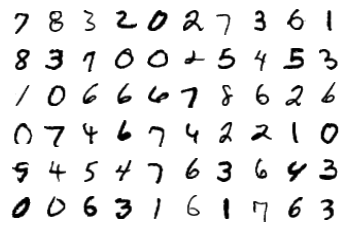

In [37]:
dataIter = iter(trainLoader)
images, labels = dataIter.next()
figure = plt.figure()
numImages = 60
for index in range(1, numImages + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [12]:
from torch import nn

# Layer details for the neural network
inputSize = 784
hiddenSizes = [128, 64]
outputSize = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(inputSize, hiddenSizes[0]),
                      nn.ReLU(),
                      nn.Linear(hiddenSizes[0], hiddenSizes[1]),
                      nn.ReLU(),
                      nn.Linear(hiddenSizes[1], outputSize),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [17]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainLoader))
images = images.view(images.shape[0], -1)

In [25]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainLoader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.to(device))
        loss = criterion(output, labels.to(device))
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainLoader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.640886764496819
Epoch 1 - Training loss: 0.28238260253135966
Epoch 2 - Training loss: 0.22456045532579233
Epoch 3 - Training loss: 0.18159265947669173
Epoch 4 - Training loss: 0.1512040060176365
Epoch 5 - Training loss: 0.12976831512084838
Epoch 6 - Training loss: 0.11289601762995505
Epoch 7 - Training loss: 0.10038444319410302
Epoch 8 - Training loss: 0.08904858431351909
Epoch 9 - Training loss: 0.07993288622942687
Epoch 10 - Training loss: 0.07400434212421557
Epoch 11 - Training loss: 0.06779611654289718
Epoch 12 - Training loss: 0.0615238082837929
Epoch 13 - Training loss: 0.0574264662168515
Epoch 14 - Training loss: 0.05239050289534573

Training Time (in minutes) = 2.972269717852275


In [28]:
def view_classify(img, ps):
    ''' 
    Display an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.to(device))

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    predLabel = probab.index(max(probab))
    trueLabel = labels.numpy()[i]
    if(trueLabel == predLabel):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))